# Convolutional Neural Network

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Preprocessing

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True,
                                  vertical_flip=True)
training_set = train_datagen.flow_from_directory('datasets/train')

Found 90 images belonging to 3 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip = True,
                                 vertical_flip=True)
test_set = test_datagen.flow_from_directory('datasets/test')

Found 30 images belonging to 3 classes.


In [4]:
import matplotlib.image as img

In [5]:
training_set.image_shape

(256, 256, 3)

## Building the CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
cnn = Sequential()

In [8]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu',input_shape=[256, 256, 3]))

In [9]:
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [10]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

In [11]:
cnn.add(Flatten())

In [13]:
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.2))
""""
cnn.add(Dense(32, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(16, activation='relu'))
cnn.add(Dropout(0.2))
""""

SyntaxError: EOL while scanning string literal (<ipython-input-13-98eb714e9b6a>, line 8)

In [14]:
cnn.add(Dense(3, activation='softmax'))

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [17]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 200,callbacks=[early_stop])

Epoch 1/200
3/3 [==============================] - 11s 4s/step - loss: 2.1119 - accuracy: 0.4077 - val_loss: 1.5386 - val_accuracy: 0.3333
Epoch 2/200
3/3 [==============================] - 9s 3s/step - loss: 1.6637 - accuracy: 0.3390 - val_loss: 1.1394 - val_accuracy: 0.3000
Epoch 3/200
3/3 [==============================] - 9s 3s/step - loss: 1.1948 - accuracy: 0.3192 - val_loss: 1.2189 - val_accuracy: 0.3333
Epoch 4/200
3/3 [==============================] - 8s 3s/step - loss: 1.1044 - accuracy: 0.4049 - val_loss: 1.1192 - val_accuracy: 0.3333
Epoch 5/200
3/3 [==============================] - 8s 3s/step - loss: 1.0931 - accuracy: 0.3333 - val_loss: 1.0734 - val_accuracy: 0.3333
Epoch 6/200
3/3 [==============================] - 8s 3s/step - loss: 1.0503 - accuracy: 0.4527 - val_loss: 1.1044 - val_accuracy: 0.4000
Epoch 7/200
3/3 [==============================] - 7s 2s/step - loss: 1.0217 - accuracy: 0.4975 - val_loss: 1.1427 - val_accuracy: 0.3000
Epoch 8/200
3/3 [================

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
modal_loss = pd.DataFrame(cnn.history.history)

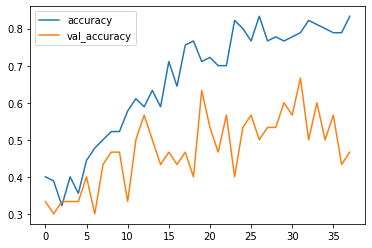

In [19]:
modal_loss[['accuracy','val_accuracy']].plot()

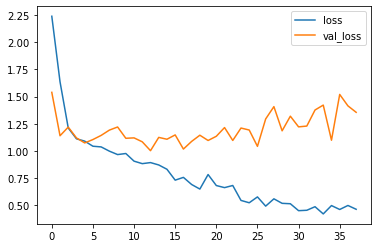

In [20]:
modal_loss[['loss','val_loss']].plot()

## Making a single prediction

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('datasets/rice_brown_leaf.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
training_set.class_indices

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

In [22]:
result

array([1], dtype=int64)

In [23]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Brown spot


In [24]:
test_image = image.load_img('datasets/rice_Leaf_smut.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)

In [25]:
result

array([1], dtype=int64)

In [26]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Brown spot


In [27]:
test_image = image.load_img('datasets/rice_Leaf_smut1.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
result

array([1], dtype=int64)

In [28]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Brown spot


In [29]:
test_image = image.load_img('datasets/rice_Bacterial-leaf-blight.jpg', target_size = (256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict_classes(test_image)
result

array([1], dtype=int64)

In [30]:
if result[0] == 0:
    prediction = 'Bacterial leaf blight'
elif result[0] == 1:
    prediction = 'Brown spot'
else:
    prediction = 'Leaf smut'
print(prediction)

Brown spot


In [31]:
pred = cnn.predict_classes(test_set)

In [32]:
test_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

### predicted classes

In [33]:
pred

array([2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 0, 1], dtype=int64)

### correct classes

In [34]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,pred))
print(confusion_matrix(test_set.classes,pred))

              precision    recall  f1-score   support

           0       0.44      0.40      0.42        10
           1       0.29      0.20      0.24        10
           2       0.36      0.50      0.42        10

    accuracy                           0.37        30
   macro avg       0.36      0.37      0.36        30
weighted avg       0.36      0.37      0.36        30

[[4 1 5]
 [4 2 4]
 [1 4 5]]


In [36]:
train_datagen

In [37]:
training_set

In [38]:
# confirm the iterator works
batchX, batchy = training_set.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [39]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0